## Load Coil20 data
## Extract DSIFT features

In [3]:
import matlab.engine
eng = matlab.engine.start_matlab()
eng.cd("./SSC_ADMM_v1.1")

'C:\\Users\\aleks_000\\Desktop\\Mentorship\\!GitHub'

In [4]:
from load import load_Coil20
from img2matrix import single_img2dsift

# I renamed files 1, 2.. to 01, 02..
# so that they are in order here
images_raw, labels = load_Coil20()
images_dsift = [single_img2dsift(image) for image in images_raw]


Loading Coil20...
----------------
Elapsed: 21.74 sec


In [9]:
import numpy as np
from skimage.transform import resize

images_compressed = np.moveaxis(resize(np.moveaxis(images_raw, 0, -1), output_shape=(32, 32),
                                       order=1, mode='reflect', anti_aliasing=True), -1, 0)

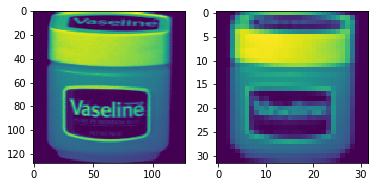

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].imshow(images_raw[0]);
#ax[1].imshow(images_dsift[0].reshape((-1, 128)));
ax[1].imshow(images_compressed[0]);

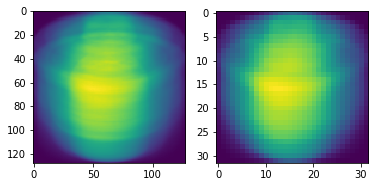

In [11]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(np.mean(images_raw, axis=0));
#ax[1].imshow(np.mean(images_dsift, axis=0).reshape((-1, 128)));
ax[1].imshow(np.mean(images_compressed, axis=0));

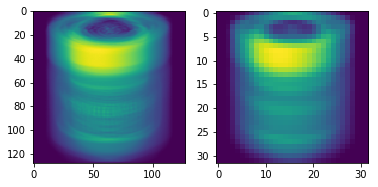

In [18]:
fig, ax = plt.subplots(1, 2)
idx = 0

ax[0].imshow(np.mean(images_raw[72*idx:72*(idx+1)], axis=0));
#ax[1].imshow(np.mean(images_dsift[72*idx:72*(idx+1)], axis=0).reshape((-1, 128)));
ax[1].imshow(np.mean(images_compressed[72*idx:72*(idx+1)], axis=0));

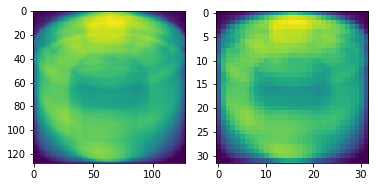

In [13]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(np.std(images_raw, axis=0));
#ax[1].imshow(np.std(images_dsift, axis=0).reshape((-1, 128)));
ax[1].imshow(np.std(images_compressed, axis=0));

In [14]:
from visualize import tSNE_2D, tSNE_3D

In [15]:
images_raw_flat = images_raw.reshape(images_raw.shape[0], -1)
images_compressed_flat = images_compressed.reshape(images_compressed.shape[0], -1)
# tSNE_2D(images_raw_flat, labels)
# tSNE_3D(images_raw_flat, labels)

In [16]:
# tSNE_2D(images_dsift, labels)
# tSNE_3D(images_dsift, labels)

## Perform PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=1000, whiten=False, svd_solver='arpack', random_state=0)
images_pca = pca.fit_transform(images_raw_flat)

images_pca.shape

In [ ]:
data_h = 25
data_w = 40

In [24]:
import matplotlib.pyplot as plt

def display_image(image, height, width):
    print(np.min(image), np.max(image))
    imgplot = plt.imshow(image.reshape((height, width)))

In [ ]:
# these are reduced parameters - not supposed to look like anything
display_image(images_pca[0], data_h, data_w)

In [ ]:
display_image(np.mean(images_pca, axis=0), data_h, data_w)

In [ ]:
display_image(np.std(images_pca, axis=0), data_h, data_w)

In [ ]:
# Check reconstruction
pca_reconstr = pca.inverse_transform(images_pca)

In [ ]:
display_image(pca_reconstr[0], -1, 128)

In [ ]:
# tSNE_2D(images_pca, labels)
# tSNE_3D(images_pca, labels)

## Normalize PCA output

In [36]:
inp = images_compressed_flat

In [37]:
# Types:
# feature-wise - normalization occurs along one pixel of all images
# image-wise - normalization occurs along all pixels of one image
# all - normalization occurs along all pixels of all images

# Methods:
# standard - mean is set to 0, std is set to 1
# [-1, 1] - min and max are used to linearly change the data range to [-1, 1]
# unit-vector - each bin is divided by its euclidean distance

#[BAD] feature, standard
#images_norm = (images_pca - np.mean(images_pca, axis=0)) / np.std(images_pca, axis=0)
# image, standard
#images_norm = (images_pca - np.mean(images_pca, axis=1)[:, np.newaxis]) / np.std(images_pca, axis=1)[:, np.newaxis]
# all, standard
#images_norm = (images_pca - np.mean(images_pca)) / np.std(images_pca)


#[BAD] feature, [-1, 1]
#mmin = np.min(images_pca, axis=0)
#mmax = np.max(images_pca, axis=0)
#[BAD] image, [-1, 1]
#mmin = np.min(images_pca, axis=1)[:, np.newaxis]
#mmax = np.max(images_pca, axis=1)[:, np.newaxis]
# all, [-1, 1]
mmin = np.min(inp)
mmax = np.max(inp)
# FOR ALL:
images_norm = (np.multiply(inp, 2, dtype='float64') - mmax - mmin) / (mmax - mmin)

#[BAD] feature, unit
#images_norm = images_pca / np.sqrt(np.sum(images_pca*images_pca, axis=0))
# image, unit
#images_norm = images_pca / np.sqrt(np.sum(images_pca*images_pca, axis=1))[:, np.newaxis]
# all, unit
#images_norm = images_pca / np.sqrt(np.sum(images_pca*images_pca))

In [38]:
# Only run when using something other than images_pca for images_norm
data_h = 32
data_w = 32

-1.0 0.8352941176470587


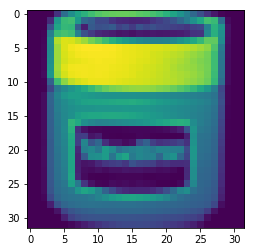

In [39]:
import matplotlib.pyplot as plt

# these are reduced parameters - not supposed to look like anything
display_image(images_norm[0], data_h, data_w)

-0.9960729847494554 0.30151688453159037


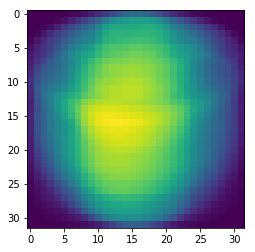

In [40]:
display_image(np.mean(images_norm, axis=0), data_h, data_w)

0.012309678777869731 0.7628106798881453


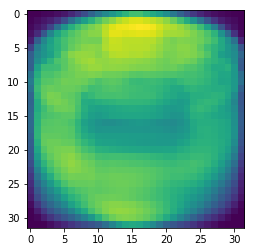

In [41]:
stds = np.std(images_norm, axis=0)
display_image(stds, data_h, data_w)

In [ ]:
print("Average std:", np.mean(stds))
print("By rows:", np.mean(stds.reshape((10, -1)), axis=1))

In [42]:
# tSNE_2D(images_norm, labels)
# tSNE_3D(images_norm, labels)

In [43]:
# from scipy.io import savemat

# savemat('./saved/raw/Coil20.mat', mdict={'X':images_raw, 'Y':labels})
# savemat('./saved/processed/Coil20.mat', mdict={'X':images_norm, 'Y':labels})

## Hyperparameters

In [44]:
lamb1 = 0.0
lamb2 = 0.0005
lamb3 = 0.0

## Calculate C matrix

In [51]:
import numpy as np
import supporting_files.sda as sda

from supporting_files.helpers import optimize
from scipy.io import savemat, loadmat

In [ ]:
# Matlab SSC #1
savemat('./temp.mat', mdict={'X': images_norm})
k = len(np.unique(labels))
alpha = 10.0
maxIter = 63
eng.SSC_modified(k, 0, False, alpha, False, 1, 1e-20, maxIter, False, 0)
C = loadmat("./temp.mat")['C']

In [ ]:
display_image(C[:110, :110], 110, 110)
print(np.mean(np.square(C)))

In [ ]:
fig, ax = plt.subplots(2)

index = 0;
ax[0].imshow(images_norm[index].reshape((data_h, data_w)));
ax[1].imshow(np.matmul(C, images_norm)[index].reshape((data_h, data_w)));
print(np.mean(np.square(images_norm - np.matmul(C, images_norm))))

## Train Autoencoder

In [45]:
import dsc
import importlib
importlib.reload(dsc)

<module 'dsc' from 'C:\\Users\\aleks_000\\Desktop\\Mentorship\\!GitHub\\dsc.py'>

In [106]:
%%time
trainC = False
C = None
d = dsc.DeepSubspaceClustering(images_norm, C=C, trainC=trainC, hidden_dims=[256, 32, 256],
                               lambda1=lamb1, lambda2=lamb2, lambda3=lamb3, weight_init='sda-normal',
                               weight_init_params=[10000, 0.0005, images_norm.shape[0], 500],
                               optimizer='Adam', decay='sqrt', sda_optimizer='Adam', sda_decay='sqrt')

Layer 1
1024 -> 256
epoch 0: global loss = 0.6380261182785034
epoch 500: global loss = 0.20429372787475586
epoch 1000: global loss = 0.16526179015636444
epoch 1500: global loss = 0.1441888064146042
epoch 2000: global loss = 0.1295700967311859
epoch 2500: global loss = 0.11838261783123016
epoch 3000: global loss = 0.10932393372058868
epoch 3500: global loss = 0.10179031640291214
epoch 4000: global loss = 0.0954267829656601
epoch 4500: global loss = 0.08998771756887436
epoch 5000: global loss = 0.08529214560985565
epoch 5500: global loss = 0.08120214939117432
epoch 6000: global loss = 0.07760536670684814
epoch 6500: global loss = 0.07442081719636917
epoch 7000: global loss = 0.0715741515159607
epoch 7500: global loss = 0.06901368498802185
epoch 8000: global loss = 0.06670385599136353
epoch 8500: global loss = 0.06461161375045776
epoch 9000: global loss = 0.06271116435527802
epoch 9500: global loss = 0.060988329350948334
Layer 2
256 -> 32
epoch 0: global loss = 0.4483273923397064
epoch 50

In [107]:
encoded_h = 4
encoded_w = 8

In [108]:
%%time
d.optimizer = optimize(d.cost, 0.0001, 'Adam', 'sqrt', d.global_step)
d.train(batch_size=images_norm.shape[0], epochs=50000, print_step=1000)
images_HM2 = d.result
images_HM = d.reconstr
if(trainC):
    trained_C = np.float64(d.outC)
else:
    trained_C = C


epoch 0: global loss = 0.07217004895210266
epoch 1000: global loss = 0.04603062942624092
epoch 2000: global loss = 0.0411110445857048
epoch 3000: global loss = 0.03796478360891342
epoch 4000: global loss = 0.03561417758464813
epoch 5000: global loss = 0.03373309597373009
epoch 6000: global loss = 0.03217070922255516
epoch 7000: global loss = 0.0308430977165699
epoch 8000: global loss = 0.029695020988583565
epoch 9000: global loss = 0.028689786791801453
epoch 10000: global loss = 0.027800992131233215
epoch 11000: global loss = 0.027007505297660828
epoch 12000: global loss = 0.026295434683561325
epoch 13000: global loss = 0.025652840733528137
epoch 14000: global loss = 0.02506963536143303
epoch 15000: global loss = 0.024538010358810425
epoch 16000: global loss = 0.024051588028669357
epoch 17000: global loss = 0.023604292422533035
epoch 18000: global loss = 0.02319151535630226
epoch 19000: global loss = 0.022809160873293877
epoch 20000: global loss = 0.022453950718045235
epoch 21000: glo

In [109]:
# lambda3 - regularization on trained_C
if(C is not None):
    display_image(trained_C[:110, :110], 110, 110)

-0.90556204 0.9912458


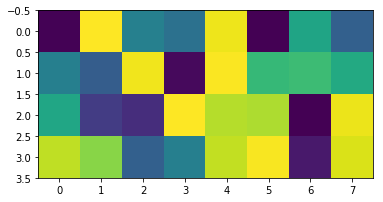

In [110]:
display_image(images_HM2[0], encoded_h, encoded_w)

In [111]:
# lambda1 - self-expressiveness
if(C is not None):
    display_image(np.matmul(trained_C, images_HM2)[0], encoded_h, encoded_w)
    print(np.mean(np.square(images_HM2 - np.matmul(trained_C, images_HM2))))

-0.3983114 0.457122


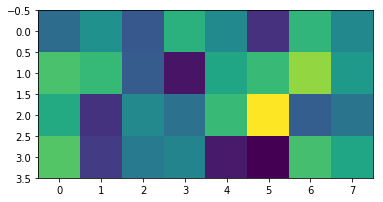

In [112]:
display_image(np.mean(images_HM2, axis=0), encoded_h, encoded_w)

0.5073253 0.74623597


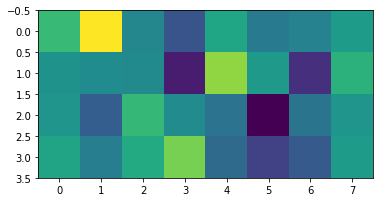

In [113]:
display_image(np.std(images_HM2, axis=0), encoded_h, encoded_w)

In [114]:
# tSNE_2D(images_HM2, labels)
# tSNE_3D(images_HM2, labels)

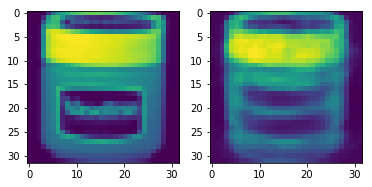

In [123]:
# AE Reconstruction
fig, ax = plt.subplots(1, 2)

index = 0;
ax[0].imshow(images_norm[index].reshape((data_h, data_w)));
ax[1].imshow(images_HM[index].reshape((data_h, data_w)));

In [ ]:
reconstr = pca.inverse_transform(((images_HM * (mmax - mmin)) + mmax + mmin) / 2)
pca_reconstr2 = pca.inverse_transform(((images_norm * (mmax - mmin)) + mmax + mmin) / 2)

In [ ]:
# AE + invPCA Reconstruction
fig, ax = plt.subplots(1, 3)

index = 0;
#ax[0].imshow(images_dsift[index].reshape((-1, 128)));
ax[0].imshow(images_raw_flat[index].reshape((-1, 128)));
ax[1].imshow(pca_reconstr2[index].reshape((-1, 128)));
ax[2].imshow(reconstr[index].reshape((-1, 128)));

In [ ]:
# PCA Features
from ipywidgets import BoundedIntText, FloatSlider, Output, VBox
idx = BoundedIntText(description="Index:", max=images_HM.shape[1]-1)
val = FloatSlider(description="Value:", continuous_update=False)
output = Output()

vector = images_HM[0].copy()
val_mins = (np.mean(images_HM, axis=0) - 2 * np.std(images_HM, axis=0)).flatten()
val_maxs = (np.mean(images_HM, axis=0) + 2 * np.std(images_HM, axis=0)).flatten()

def update_channels(change):
    val.min = val_mins[change.new]
    val.max = val_maxs[change.new]
    val.step = (val_maxs[change.new] - val_mins[change.new]) / 100
    val.value = vector[change.new]
idx.observe(update_channels, 'value')

def update_plot(change):
    if(change is not None):
        vector[idx.value] = change.new
    output.clear_output(wait=True)
    with output:
        plt.imshow(vector.reshape((data_h, data_w)))
        plt.show()
        plt.imshow((pca.inverse_transform((vector * (mmax - mmin)) + mmax + mmin) / 2).reshape((-1, 128)))
        plt.show()
val.observe(update_plot, 'value')

update_channels(type('obj', (object,), {'new': 0}))
VBox([idx, val, output])

In [195]:
# Orthogonalize HM2 with PCA
from sklearn.decomposition import PCA
import numpy as np

pca2 = PCA(n_components=30, whiten=False, svd_solver='arpack', random_state=0)
images_HM2_orth = pca2.fit_transform(images_HM2)

images_HM2_orth.shape

(1440, 30)

0.34659332 1.2145126
By rows: [0.9986099  0.71010333 0.5775157  0.50338256 0.44194    0.37151104]


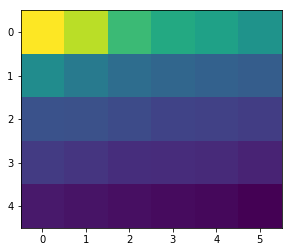

In [199]:
stds2 = np.std(images_HM2_orth, axis=0)
display_image(stds2, 5, 6)
print("By rows:", np.mean(stds2.reshape((6, -1)), axis=1))

In [ ]:
# AE Features (orthogonalized)
from ipywidgets import BoundedIntText, FloatSlider, Output, VBox
idx = BoundedIntText(description="Index:", max=images_HM.shape[1]-1)
val = FloatSlider(description="Value:", continuous_update=False)
output = Output()

vector = images_HM[0].copy()
val_mins = (np.mean(images_HM, axis=0) - 2 * np.std(images_HM, axis=0)).flatten()
val_maxs = (np.mean(images_HM, axis=0) + 2 * np.std(images_HM, axis=0)).flatten()

def update_channels(change):
    val.min = val_mins[change.new]
    val.max = val_maxs[change.new]
    val.step = (val_maxs[change.new] - val_mins[change.new]) / 100
    val.value = vector[change.new]
idx.observe(update_channels, 'value')

def update_plot(change):
    if(change is not None):
        vector[idx.value] = change.new
    output.clear_output(wait=True)
    with output:
        plt.imshow(vector.reshape((data_h, data_w)))
        plt.show()
        plt.imshow((pca.inverse_transform((vector * (mmax - mmin)) + mmax + mmin) / 2).reshape((-1, 128)))
        plt.show()
val.observe(update_plot, 'value')

update_channels(type('obj', (object,), {'new': 0}))
VBox([idx, val, output])

In [190]:
# Matlab SSC #2
k = len(np.unique(labels))
alpha = 200.0
maxIter = 63
if(not trainC):
    savemat('./temp.mat', mdict={'X': images_HM2})
else:
    savemat('./temp.mat', mdict={'C': C})
grps = eng.SSC_modified(k, 0, False, alpha, False, 1, 1e-20, maxIter, True, 0, trainC)
C_after = loadmat("./temp.mat")['C']
labels_pred = np.asarray(grps, dtype=np.int32).flatten()

In [191]:
from ipywidgets import IntSlider, Output, VBox
sld_x = IntSlider(description="X:", max=C_after.shape[1]-110, continuous_update=True)
sld_y = IntSlider(description="Y:", max=C_after.shape[0]-110, continuous_update=True)
output = Output()

def update_C(change):
    output.clear_output(wait=True)
    with output:
        plt.imshow(C_after[sld_y.value:sld_y.value+110, sld_x.value:sld_x.value+110].reshape((110, 110)))
        plt.show()
sld_x.observe(update_C, 'value')
sld_y.observe(update_C, 'value')

update_C(None)
VBox([sld_x, sld_y, output])

In [162]:
# tSNE_2D(images_HM2, labels_pred)
# tSNE_3D(images_HM2, labels_pred)

## Perform clustering with SSC

In [163]:
from supporting_files.ji_zhang import err_rate
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import adjusted_rand_score as ari

print("Accuracy: ", str(1-err_rate(labels, labels_pred)))
print("NMI: ", str(nmi(labels, labels_pred, average_method="geometric")))
print("ARI: ", str(ari(labels, labels_pred)))

Accuracy:  0.5916666666666667
NMI:  0.7036188060159435
ARI:  0.4957959986311896
